In [1]:
import geopy
import numpy as np
import math
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.cluster import DBSCAN
from geopy.distance import vincenty
import pandas as pd

In [2]:
d_max = 1 # Distância máxima: 1km

In [3]:
def calcula_distancias(locs_1, locs_2):
    n_linhas_1 = locs_1.shape[0]
    n_linhas_2 = locs_2.shape[0]
    dists = np.empty((n_linhas_1, n_linhas_2))
    for i in range(n_linhas_1):
        for j in range(n_linhas_2):
            dists[i, j] = geopy.distance.vincenty(locs_1[i], locs_2[j]).km
    return dists

In [4]:
locais = pd.read_excel('Planilha para distribuicao do efetivo.xlsx', sheet_name='dados')
locais[:5]

longitude 
 latitude 
 cod_localidade_tse 
 nom_localidade 
 nom_bairro 
 num_local 
 nom_local 
 des_endereco 
 codigo 
 lqtd_secoes 
 ... 
 indigenas 
 grupos 
 efetivo 
 crimes_eleitorais 
 boca_de_urna 
 roubo 
 furto 
 desacato 
 desobediencia 
 CV 
 
 
 
 
 0 
 -61.504226 
 -10.870787 
 89960 
 RONDOLÂNDIA 
 CENTRO 
 1015 
 ESCOLA ESTADUAL OLAVO BILAC 
 RUA MATHILDE KLEMS, S/N 
 61899601015 
 10 
 ... 
 0 
 295 
 2.000000 
 0 
 0 
 0 
 2 
 1 
 0 
 0 
 
 
 1 
 -60.941759 
 -10.475339 
 89960 
 RONDOLÂNDIA 
 ZONA RURAL 
 1066 
 ESCOLA ZAWA KAREY PANGYJY 
 ALDEIA INDÍGENA ZORÓ 
 61899601066 
 1 
 ... 
 267 
 297 
 2.000000 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 2 
 -60.180703 
 -14.107886 
 90867 
 NOVA LACERDA 
 GLEBA SANTA AMÉLIA 
 1040 
 ESCOLA MUNICIPAL VALE DO GUAPORÉ 
 COMUNIDADE SANTA AMÉLIA 
 61908671040 
 1 
 ... 
 0 
 298 
 0.180556 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 3 
 -59.967301 
 -15.014093 
 91090 
 VILA BELA DA SANTÍSSIMA TRINDADE 
 JARDIM AEROPORTO 
 1341 
 CRECHE AVIAOZINHO 
 AVENIDA MARTIMIANO RIBEIRO DA FONSECA, S/N 
 25910901341 
 1 
 ... 
 0 
 125 
 0.208700 
 0 
 1 
 0 
 13 
 0 
 1 
 0 
 
 
 4 
 -59.950224 
 -15.003089 
 91090 
 VILA BELA DA SANTÍSSIMA TRINDADE 
 CENTRO 
 1171 
 CAMARA MUNICIPAL DE VILA BELA DA SANTISSIMA TR... 
 AV. SÃO LUIZ, S/N, VILA BELA DA SS. TRINDADE 
 25910901171 
 2 
 ... 
 0 
 125 
 0.600000 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 
 5 rows × 21 columns

In [5]:
coords = locais[['longitude','latitude']].values
matriz_distancias = calcula_distancias(coords, coords)

In [6]:
matriz_distancias.shape

(1478, 1478)

In [7]:
matriz_distancias[:5]

array([[   0.        ,   66.18017766,  229.587452  , ..., 1224.13550379,
        1224.27558743, 1249.01214879],
       [  66.18017766,    0.        ,  216.50955026, ..., 1161.21112574,
        1161.34618197, 1185.53982862],
       [ 229.587452  ,  216.50955026,    0.        , ..., 1100.428728  ,
        1100.61519704, 1130.48952764],
       [ 283.50213756,  272.28352866,   55.774277  , ..., 1090.93086467,
        1091.13030532, 1122.38046158],
       [ 284.22572745,  272.55321051,   56.07755092, ..., 1088.93159991,
        1089.13103518, 1120.38122882]])

In [8]:
grupos_obj = DBSCAN(metric='precomputed',  min_samples=d_max, algorithm='auto').fit(matriz_distancias)

In [9]:
grupos = grupos_obj.labels_

In [10]:
n_grupos = len(set(grupos)) - (1 if -1 in grupos else 0)
print('Número estimado de grupos: %d' % n_grupos)

Número estimado de grupos: 700


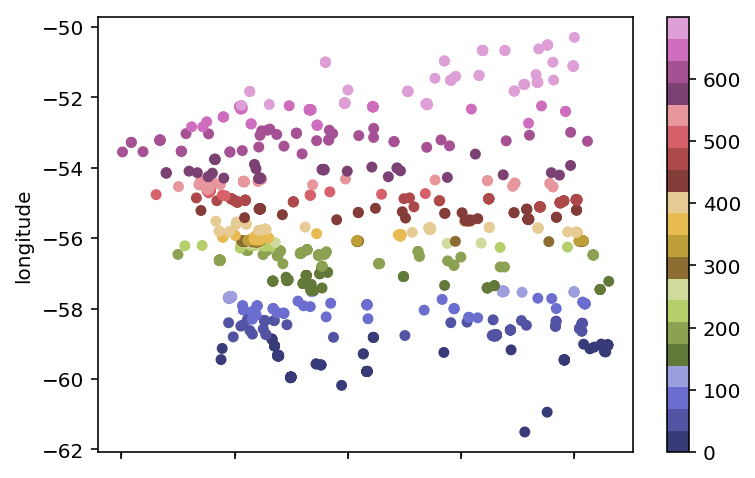

In [11]:
ax1 = locais.plot.scatter(x='latitude',
                      y='longitude',
                      c=grupos,
                      colormap='tab20b')

In [12]:
locais['GRUPOS'] = grupos

In [13]:
locais[:5]

longitude 
 latitude 
 cod_localidade_tse 
 nom_localidade 
 nom_bairro 
 num_local 
 nom_local 
 des_endereco 
 codigo 
 lqtd_secoes 
 ... 
 grupos 
 efetivo 
 crimes_eleitorais 
 boca_de_urna 
 roubo 
 furto 
 desacato 
 desobediencia 
 CV 
 GRUPOS 
 
 
 
 
 0 
 -61.504226 
 -10.870787 
 89960 
 RONDOLÂNDIA 
 CENTRO 
 1015 
 ESCOLA ESTADUAL OLAVO BILAC 
 RUA MATHILDE KLEMS, S/N 
 61899601015 
 10 
 ... 
 295 
 2.000000 
 0 
 0 
 0 
 2 
 1 
 0 
 0 
 0 
 
 
 1 
 -60.941759 
 -10.475339 
 89960 
 RONDOLÂNDIA 
 ZONA RURAL 
 1066 
 ESCOLA ZAWA KAREY PANGYJY 
 ALDEIA INDÍGENA ZORÓ 
 61899601066 
 1 
 ... 
 297 
 2.000000 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 
 
 2 
 -60.180703 
 -14.107886 
 90867 
 NOVA LACERDA 
 GLEBA SANTA AMÉLIA 
 1040 
 ESCOLA MUNICIPAL VALE DO GUAPORÉ 
 COMUNIDADE SANTA AMÉLIA 
 61908671040 
 1 
 ... 
 298 
 0.180556 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 2 
 
 
 3 
 -59.967301 
 -15.014093 
 91090 
 VILA BELA DA SANTÍSSIMA TRINDADE 
 JARDIM AEROPORTO 
 1341 
 CRECHE AVIAOZINHO 
 AVENIDA MARTIMIANO RIBEIRO DA FONSECA, S/N 
 25910901341 
 1 
 ... 
 125 
 0.208700 
 0 
 1 
 0 
 13 
 0 
 1 
 0 
 3 
 
 
 4 
 -59.950224 
 -15.003089 
 91090 
 VILA BELA DA SANTÍSSIMA TRINDADE 
 CENTRO 
 1171 
 CAMARA MUNICIPAL DE VILA BELA DA SANTISSIMA TR... 
 AV. SÃO LUIZ, S/N, VILA BELA DA SS. TRINDADE 
 25910901171 
 2 
 ... 
 125 
 0.600000 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 4 
 
 
 
 5 rows × 22 columns

In [14]:
res1 = pd.ExcelWriter('res1 DBSCAN.xlsx')
locais.to_excel(res1,'dados',index=False)
res1.save()